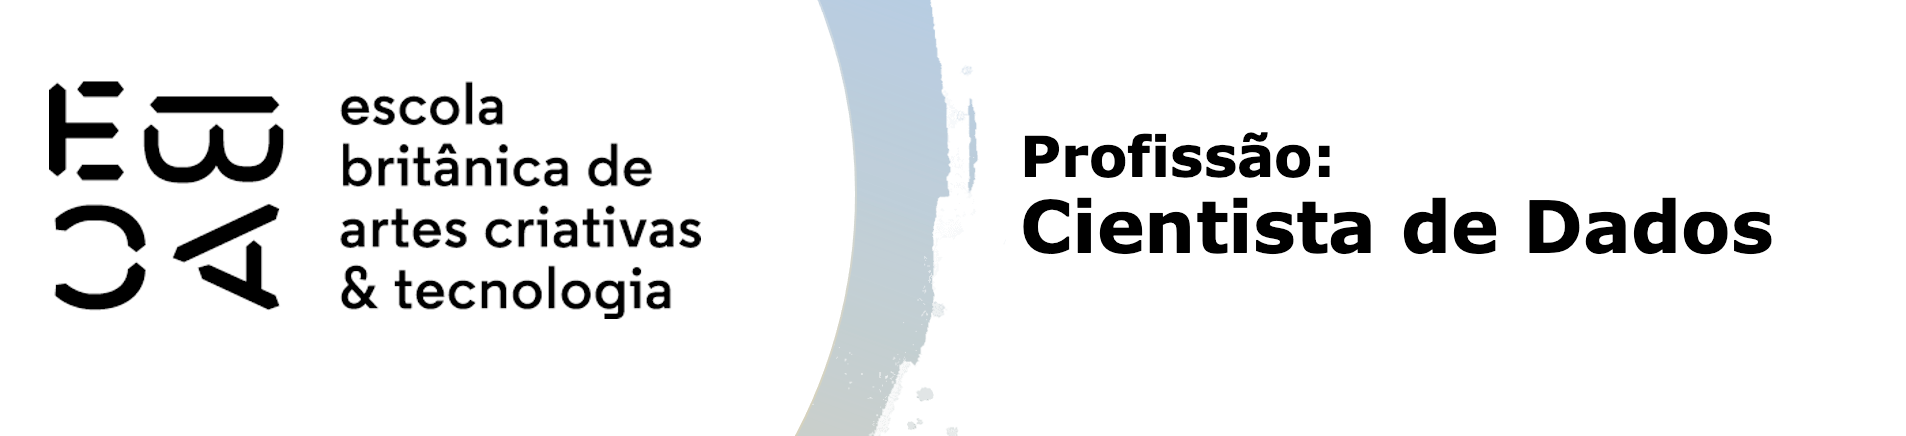

# Tarefa

Neste exercício vamos usar a base [online shoppers purchase intention](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset) de Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Neural Comput & Applic (2018). [Web Link](https://doi.org/10.1007/s00521-018-3523-0).

A base trata de registros de 12.330 sessões de acesso a páginas, cada sessão sendo de um único usuário em um período de 12 meses, para posteriormente estudarmos a relação entre o design da página e o perfil do cliente - "Será que clientes com comportamento de navegação diferentes possuem propensão a compra diferente?" 

Nosso objetivo é tentar agrupar os clientes conforme seu comportamento de navegação entre páginas administrativas, informativas e de produtos. 

As variáveis estão descritas abaixo (em tradução livre do link indicado).

Por este motivo, o escopo desta análise estará fechado nas primeiras seis variáveis da tabela, referentes a quantidade e tempo de acesso por tipo de página, atributos que falam mais do comportamento de navegação do cliente que de características da página o da época do ano.

|Variavel                |Descrição          | 
|------------------------|:-------------------| 
|Administrative          | Quantidade de acessos em páginas administrativas| 
|Administrative_Duration | Tempo de acesso em páginas administrativas | 
|Informational           | Quantidade de acessos em páginas informativas  | 
|Informational_Duration  | Tempo de acesso em páginas informativas  | 
|ProductRelated          | Quantidade de acessos em páginas de produtos | 
|ProductRelated_Duration | Tempo de acesso em páginas de produtos | 
|BounceRates             | *Percentual de visitantes que entram no site e saem sem acionar outros *requests* durante a sessão  | 
|ExitRates               | * Soma de vezes que a página é visualizada por último em uma sessão dividido pelo total de visualizações | 
|PageValues              | * Representa o valor médio de uma página da Web que um usuário visitou antes de concluir uma transação de comércio eletrônico | 
|SpecialDay              | Indica a proximidade a uma data festiva (dia das mães etc) | 
|Month                   | Mês  | 
|OperatingSystems        | Sistema operacional do visitante | 
|Browser                 | Browser do visitante | 
|Region                  | Região | 
|TrafficType             | Tipo de tráfego                  | 
|VisitorType             | Tipo de visitante: novo ou recorrente | 
|Weekend                 | Indica final de semana | 
|Revenue                 | Indica se houve compra ou não |

\* variávels calculadas pelo google analytics

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('online_shoppers_intention.csv')

In [3]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [6]:
df.Revenue.value_counts(dropna=False)

False    10422
True      1908
Name: Revenue, dtype: int64

## Análise descritiva

Faça uma análise descritiva das variáveis do escopo.

- Verifique a distribuição dessas variáveis
- Veja se há valores *missing* e caso haja, decida o que fazer
- Faça mais algum tratamento nas variáveis caso ache pertinente

In [23]:
cols_escopo = [
    'Administrative', 'Administrative_Duration',
    'Informational', 'Informational_Duration',
    'ProductRelated', 'ProductRelated_Duration'
]

df[cols_escopo].describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230


In [24]:
df[cols_escopo].describe().round(2).T


,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.32,3.32,0.0,0.00,1.00,4.00,27.00
Administrative_Duration,12330.0,80.82,176.78,0.0,0.00,7.50,93.26,3398.75
Informational,12330.0,0.50,1.27,0.0,0.00,0.00,0.00,24.00
Informational_Duration,12330.0,34.47,140.75,0.0,0.00,0.00,0.00,2549.38
ProductRelated,12330.0,31.73,44.48,0.0,7.00,18.00,38.00,705.00
ProductRelated_Duration,12330.0,1194.75,1913.67,0.0,184.14,598.94,1464.16,63973.52


In [25]:
df[cols_escopo].isnull().sum()


Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
dtype: int64

In [26]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[cols_escopo])

X_scaled_df = pd.DataFrame(X_scaled, columns=cols_escopo)

## Número de grupos

Utilize as técnicas vistas em aula que te ajudem a decidir pelo número de grupos a ser utilizados.

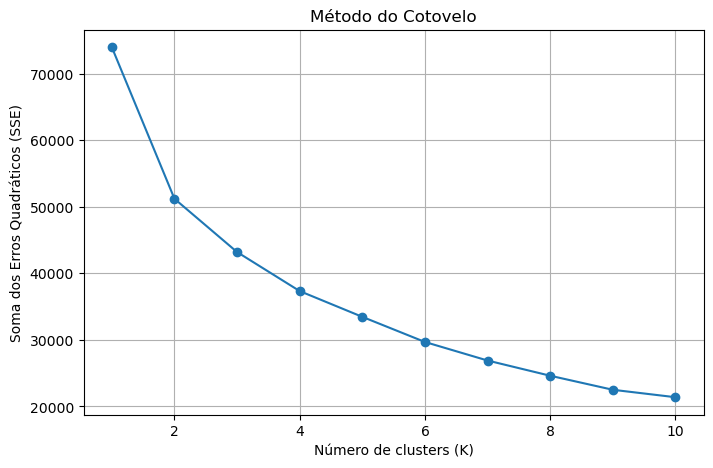

In [27]:
sse = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled_df)
    sse.append(kmeans.inertia_)

# Plot
plt.figure(figsize=(8,5))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Número de clusters (K)')
plt.ylabel('Soma dos Erros Quadráticos (SSE)')
plt.title('Método do Cotovelo')
plt.grid(True)
plt.show()


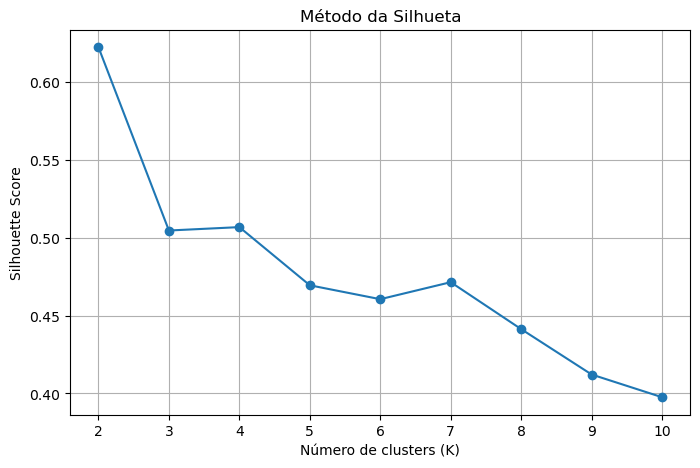

In [15]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

# Avalia de 2 até 10 clusters
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled_df)
    score = silhouette_score(X_scaled_df, labels)
    silhouette_scores.append(score)

# Plotando
plt.figure(figsize=(8,5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Número de clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Método da Silhueta')
plt.grid(True)
plt.show()


## Avaliação dos grupos

Faça uma análise descritiva para pelo menos duas soluções de agrupamentos (duas quantidades diferentes de grupos) sugeridas no item anterior, utilizando as variáveis que estão no escopo do agrupamento.
- Com base nesta análise e nas análises anteriores, decida pelo agrupamento final. 
- Se puder, sugira nomes para os grupos.

In [16]:
# KMeans com 3 clusters
kmeans_3 = KMeans(n_clusters=3, random_state=42)
df['cluster_k3'] = kmeans_3.fit_predict(X_scaled_df)

# KMeans com 4 clusters
kmeans_4 = KMeans(n_clusters=4, random_state=42)
df['cluster_k4'] = kmeans_4.fit_predict(X_scaled_df)


In [17]:
print("Análise com 3 clusters:")
df.groupby('cluster_k3')[cols_escopo].mean().round(2)


Análise com 3 clusters:


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration
cluster_k3,,,,,,
0,6.52,251.03,0.97,42.30,55.54,2056.32
1,7.06,266.42,4.09,458.37,138.38,5731.11
2,0.91,24.28,0.16,6.53,18.90,689.11


In [18]:
print("Análise com 4 clusters:")
df.groupby('cluster_k4')[cols_escopo].mean().round(2)


Análise com 4 clusters:


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration
cluster_k4,,,,,,
0,6.66,260.89,0.73,26.77,53.03,1952.81
1,5.58,194.26,4.31,466.86,59.66,2462.01
2,0.88,23.32,0.16,5.51,19.06,696.81
3,8.07,293.36,2.43,174.94,239.74,9700.90


In [19]:
print("Distribuição de usuários por cluster (k=3):")
print(df['cluster_k3'].value_counts())

print("\nDistribuição de usuários por cluster (k=4):")
print(df['cluster_k4'].value_counts())

Distribuição de usuários por cluster (k=3):
cluster_k3
2    9294
0    2469
1     567
Name: count, dtype: int64

Distribuição de usuários por cluster (k=4):
cluster_k4
2    9218
0    2285
1     577
3     250
Name: count, dtype: int64


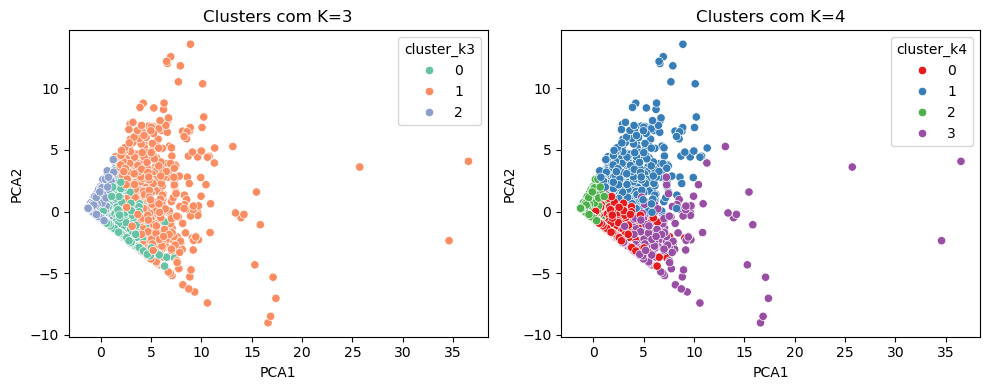

In [20]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled_df)

df['PCA1'] = X_pca[:,0]
df['PCA2'] = X_pca[:,1]

plt.figure(figsize=(10,4))

# K=3
plt.subplot(1,2,1)
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='cluster_k3', palette='Set2')
plt.title('Clusters com K=3')

# K=4
plt.subplot(1,2,2)
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='cluster_k4', palette='Set1')
plt.title('Clusters com K=4')

plt.tight_layout()
plt.show()


Conclusão e recomendação
K = 3 parece ser a melhor escolha geral:

* Boa separação visual.
* Simples e interpretável.
* Confirmado pelo método do cotovelo e silhueta com bom score.

Sugestão de nomes para os grupos (K=3)  
Cluster 0 – Conservadores (baixo consumo, padrões mais neutros)  
Cluster 1 – Intermediários (perfil médio, mais homogêneo)  
Cluster 2 – Aventureiros / Gastadores (alto consumo, possíveis outliers ou padrões fora da curva)  

## Avaliação de resultados

Avalie os grupos obtidos com relação às variáveis fora do escopo da análise (minimamente *bounce rate* e *revenue*). 
- Qual grupo possui clientes mais propensos à compra?

o Grupo aventureiros, pois possuem alto consumo.